In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("D:/DS&A/Lab/Lab03/Lab03/Countries.csv")
df.head()

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450


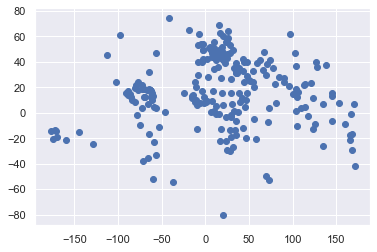

In [3]:
x=df['Longitude']
y=df['Latitude']
plt.matplotlib.pyplot.scatter(x, y)


In [8]:
x=df.iloc[:,1:3]
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


In [7]:
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=['Longitude', 'Latitude'])


In [9]:
kmeans = KMeans(3)
kmeans.fit(x)


KMeans(n_clusters=3)

In [10]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       2, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 1, 2,
       1, 2, 1, 2, 1, 0, 0, 1, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 0, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1])

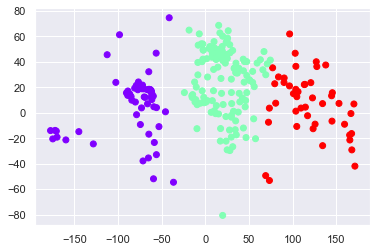

In [12]:
data_with_Clusters=df.copy()
data_with_Clusters['Clusters']=identified_clusters
plt.scatter(data_with_Clusters['Longitude'],data_with_Clusters['Latitude'],c=data_with_Clusters['Clusters'],cmap='rainbow')

F:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'Within-cluster Sum of Squares')

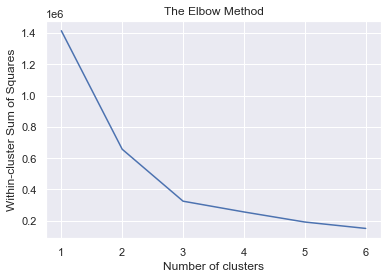

In [15]:
wcss=[]
for i in range(1,7): 
    kmeans = KMeans(i)
    kmeans.fit(x) 
    wcss_iter = kmeans.inertia_ 
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method') 
plt.xlabel('Number of clusters') 
plt.ylabel('Within-cluster Sum of Squares')
